In [29]:
import wave
import numpy as np
from scipy.stats import skew, kurtosis, pearsonr
import os
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, decomposition, preprocessing 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, \
ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
os.chdir('C:\\Users\\e0970596\\Downloads\\ESC-50-master\\meta')

In [3]:
audio = pd.read_csv('esc50.csv')
audio.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [4]:
dog = audio[audio.target==0]
rooster = audio[audio.target==1]
pig = audio[audio.target==2]
cow = audio[audio.target==3]
frog = audio[audio.target==4]
cat = audio[audio.target==5]
hen = audio[audio.target==6]
insects = audio[audio.target==7]
sheep = audio[audio.target==8]
crow = audio[audio.target==9]
rain = audio[audio.target==10]
seaWaves = audio[audio.target==11]
cracklingFire = audio[audio.target==12]
crickets = audio[audio.target==13]
chirpingBirds = audio[audio.target==14]
waterDrops = audio[audio.target==15]
wind = audio[audio.target==16]
pouringWater = audio[audio.target==17]
toiletFlush = audio[audio.target==18]
thunderstorm = audio[audio.target==19]
cryingBaby = audio[audio.target==20]
sneezing = audio[audio.target==21]
clapping = audio[audio.target==22]
breathing = audio[audio.target==23]
coughing = audio[audio.target==24]
footsteps = audio[audio.target==25]
laughing = audio[audio.target==26]
brushingTeeth = audio[audio.target==27]
snoring = audio[audio.target==28]
drinking = audio[audio.target==29]
doorKnock = audio[audio.target==30]
mouseClick = audio[audio.target==31]
keyboardTyping = audio[audio.target==32]
door = audio[audio.target==33]
canOpening = audio[audio.target==34]
washingMachine = audio[audio.target==35]
vacuumCleaner = audio[audio.target==36]
alarm = audio[audio.target==37]
clockTick = audio[audio.target==38]
glassBreaking = audio[audio.target==39]
helicopter = audio[audio.target==40]
chainsaw = audio[audio.target==41]
siren = audio[audio.target==42]
carHorn = audio[audio.target==43]
engine = audio[audio.target==44]
train = audio[audio.target==45]
churchBells = audio[audio.target==46]
airplane = audio[audio.target==47]
fireworks = audio[audio.target==48]
handSaw = audio[audio.target==49]

# Water Drop sounds

In [5]:
# reading water drops sounds

path = 'C:\\Users\\e0970596\\Downloads\\ESC-50-master\\audio'

def read_sounds(data, path):

    filenames = data['filename']
    filepaths = [os.path.join(path, filename) for filename in filenames]

    audioData = []
    for filepath in filepaths:
        aud, sr = librosa.load(filepath, sr=None)
        audioData.append(aud)  
    return audioData
    
drops_audio = read_sounds(waterDrops, path)

In [6]:
# splitting each water drop sound file into 100 windows 

def split_windows(data, window_size, step):
    total_windows = []
    for file in data:
        windows = []
        i = 0
        while i in range(len(file)):
            windows.append(file[i:i + window_size])
            i += step
        total_windows.append(windows)
    return total_windows

def get_window(file, size):
    return int(len(file) / size)

window_size = get_window(drops_audio[0], 100)
step = window_size

drops_total_windows = np.array(split_windows(drops_audio, window_size, step), dtype=object)

In [7]:
# getting the mean of each water drop window

def mean_window(total_windows):
    windowed_mean = []
    for file in total_windows:
        mean = [np.mean(window) for window in file]
        windowed_mean.append(mean)
    return windowed_mean
        
drops_matrix = np.array(mean_window(drops_total_windows), dtype=object)

In [49]:
# adding labels

def add_label(matrix, label):
    df = pd.DataFrame(matrix)
    df['label'] = [label for i in range(len(df))]
    return df

drops_df = add_label(drops_matrix, 'drops')
drops_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.000528,-0.000862,0.000385,0.000144,-0.000011,-0.000061,-0.000018,-0.000046,-0.000953,0.001192,...,-0.000278,-0.00013,-0.000275,-0.000885,0.000934,0.000221,0.00046,-0.000088,-0.000073,drops
1,0.000057,-0.000068,-0.000152,0.000034,0.0,0.00013,-0.000019,-0.00007,0.000054,-0.000006,...,0.000023,0.000037,-0.000068,-0.000174,0.00006,0.00005,0.000087,-0.000112,0.000014,drops
2,-0.000151,-0.000044,0.000273,-0.000102,-0.00015,0.00009,0.000051,0.000007,-0.000067,-0.000042,...,-0.000118,0.000093,-0.000047,0.000113,-0.000017,-0.000021,-0.000052,-0.000013,0.000136,drops
3,-0.000279,0.000229,-0.000316,-0.000014,-0.000013,-0.000086,-0.000452,0.000254,0.000677,0.000631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drops
4,-0.000027,0.000015,0.000003,-0.000017,0.000022,-0.000016,-0.00001,0.000028,-0.000028,-0.000002,...,0.000007,-0.000014,0.000011,-0.000005,-0.000021,0.000032,-0.000003,-0.0,0.000004,drops







# Wind sounds

In [9]:
#reading wind sounds

path = 'C:\\Users\\e0970596\\Downloads\\ESC-50-master\\audio'

wind_audio = read_sounds(wind, path)

In [10]:
# splitting each wind sound file into 100 windows 

window_size = get_window(wind_audio[0], 100)
step = window_size

wind_total_windows = np.array(split_windows(wind_audio, window_size, step), dtype=object)

In [11]:
# getting the mean of each wind window

wind_matrix = np.array(mean_window(wind_total_windows), dtype=object)

In [12]:
# changing matrix to dataframe

wind_df = add_label(wind_matrix, 'wind')
wind_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.02221,0.007307,-0.003163,-0.008841,0.004439,-0.017463,0.007285,0.035653,-0.032859,-0.009138,...,-0.012955,0.028754,-0.097343,0.065468,-0.014267,-0.029621,0.063607,0.001164,-0.034472,wind
1,0.000595,-0.000191,-0.0001,0.000192,0.000355,-0.001034,0.000424,-0.00023,0.000915,-0.000451,...,0.000061,0.000372,-0.001018,0.000499,0.001237,-0.00162,0.001235,0.000368,-0.001131,wind
2,0.005129,-0.013359,-0.019457,0.005097,-0.003174,-0.030132,0.012037,0.017654,-0.030419,-0.017786,...,-0.008086,-0.02253,0.009597,-0.010508,0.048137,-0.028405,0.007252,-0.001372,0.048524,wind
3,-0.0071,0.048089,0.001261,-0.033934,0.009868,-0.01869,0.03623,0.004755,-0.005146,0.005989,...,0.000805,0.043432,-0.055051,-0.007861,0.009328,-0.029964,0.020735,-0.031788,0.076377,wind
4,0.000098,0.000155,-0.000256,-0.000083,0.000098,0.000543,-0.000522,0.000289,-0.000092,-0.000242,...,-0.000036,0.000285,-0.000102,0.000164,-0.000035,-0.00017,-0.000457,0.000267,0.000339,wind


# Training the model

In [13]:
# combining the 2 dataframes

df = pd.concat([drops_df, wind_df])
df = shuffle(df, random_state=42)
df.index = [i for i in range(len(df))]
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.003202,0.005311,-0.002291,0.000227,0.006402,-0.008488,0.004805,-0.015516,0.017482,-0.007259,...,0.000792,-0.0001,-0.000569,0.000174,-0.000577,-0.001206,0.001387,-0.002983,0.002229,drops
1,0.000528,-0.000862,0.000385,0.000144,-0.000011,-0.000061,-0.000018,-0.000046,-0.000953,0.001192,...,-0.000278,-0.00013,-0.000275,-0.000885,0.000934,0.000221,0.00046,-0.000088,-0.000073,drops
2,-0.000007,-0.000007,-0.000006,-0.000007,-0.000006,-0.000007,-0.000015,-0.000014,-0.000015,0.00003,...,-0.000021,-0.00001,-0.000012,-0.00001,-0.000018,-0.00001,-0.000011,-0.000016,-0.000008,drops
3,0.001812,-0.00185,0.001016,-0.001649,-0.0,-0.000818,0.007457,-0.009552,0.000178,0.003262,...,0.002058,-0.000014,0.001194,-0.005592,0.006997,-0.003918,-0.000029,0.000136,0.001376,drops
4,-0.000533,0.001786,-0.001025,0.000425,-0.000191,0.000108,-0.000051,0.000024,-0.00001,-0.000026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.000004,-0.000023,0.000013,-0.000833,0.000467,0.000086,0.000089,-0.000012,-0.000156,0.000018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drops
76,-0.072023,-0.147261,0.307149,-0.071781,-0.182073,0.245539,-0.140041,0.045978,-0.11495,0.182789,...,-0.024471,0.007262,-0.002745,0.006782,0.02412,-0.048398,0.091236,-0.085397,0.062835,wind
77,0.002009,-0.000622,0.002731,-0.000045,-0.009389,0.011783,-0.020269,0.007464,0.012318,-0.013032,...,-0.005137,0.002213,-0.000301,0.000847,-0.001638,0.002056,0.002225,0.001247,-0.002584,wind
78,-0.000187,-0.000097,-0.000241,-0.000182,-0.000157,-0.00013,-0.000227,-0.000284,-0.000079,-0.000331,...,-0.000234,-0.000151,-0.000172,-0.000202,-0.000175,-0.000228,-0.000235,-0.000259,0.000071,drops


In [14]:
# label encoding

labels = df['label']
encoder = preprocessing.LabelEncoder()
df['label'] = encoder.fit_transform(labels)

In [15]:
# splitting the dataset into train and test sets

x = df.drop('label', 1)
y = df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

### Gradient Boosting Classifier

In [37]:
gbc = GradientBoostingClassifier(random_state=42)

params = {
    "learning_rate": [0.01, 0.1, 0.5],
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
    }

grid_search = GridSearchCV(estimator=gbc,
                          param_grid=params,
                          cv=5,
                          n_jobs=-1)

start = time.time()

grid_search.fit(x_train, y_train)
print(grid_search.score(x_train, y_train))

best_params = grid_search.best_params_

end = time.time()
elapsed = end - start
print('time taken is {} seconds'.format(elapsed))

0.96875
time taken is 134.3847415447235 seconds


In [30]:
gbc = GradientBoostingClassifier(**best_params)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=4,
                           n_estimators=50)

In [31]:
y_pred = gbc.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

Accuracy: 0.8125
Precision: 0.8571428571428571
Recall: 0.75


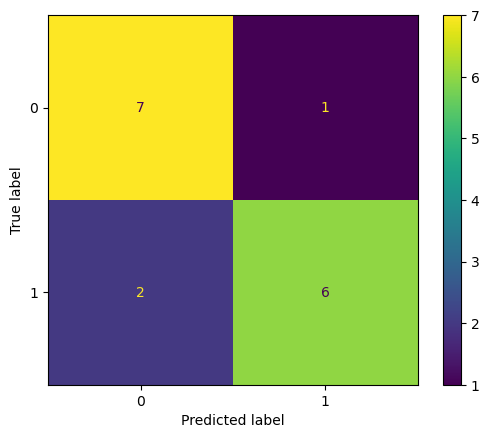

In [25]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Decision Tree

In [41]:
dt = DecisionTreeClassifier()

params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": np.arange(1, 11),
    "min_samples_split": np.arange(2, 11),
    "min_samples_leaf": np.arange(1, 11)    
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, 
                           verbose=True)

start = time.time()

grid_search.fit(x_train, y_train)

dt_best = grid_search.best_estimator_

end = time.time()
elapsed = end - start
print('time taken is {} seconds'.format(elapsed))

dt_best

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
time taken is 94.20868802070618 seconds


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=4)

In [27]:
y_pred = dt_best.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

Accuracy: 0.8125
Precision: 0.8571428571428571
Recall: 0.75


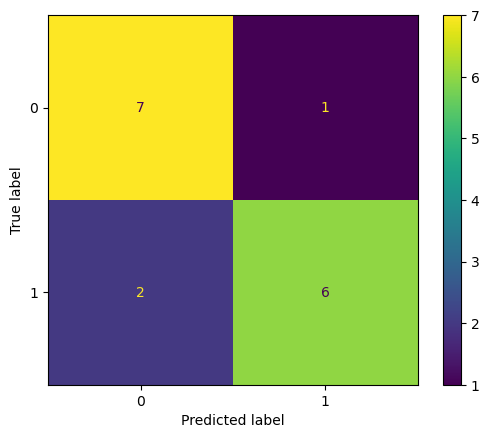

In [28]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Random Forest Classifier

In [17]:
# fitting the random forest classifier model

rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
rf.fit(x_train, y_train)
rf.oob_score_

0.890625

In [42]:
# finding the best parameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

start = time.time()

grid_search.fit(x_train, y_train)

print(grid_search.best_score_)

rf_best = grid_search.best_estimator_

end = time.time()
elapsed = end - start
print('time taken is {} seconds'.format(elapsed))

rf_best

Fitting 4 folds for each of 180 candidates, totalling 720 fits
0.890625
time taken is 62.15082669258118 seconds


RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, oob_score=True, random_state=42)

In [50]:
y_pred = rf_best.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

Accuracy: 0.875
Precision: 0.875
Recall: 0.875


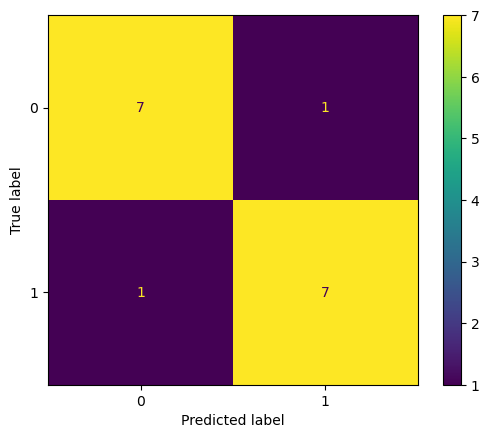

In [44]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Logistic Regression

In [40]:
#finding the best parameters

lr_model = LogisticRegression()

param_grid = {
    'C': np.logspace(-4, 4, 50), 
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  
    'penalty': ['l1', 'l2'],
    'tol' : [1e-3, 1e-4, 1e-5],
    'max_iter': [100, 200, 300, 400, 500]
}

start = time.time()

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

end = time.time()
elapsed = end - start
print('time taken is {} seconds'.format(elapsed))

print("Best Hyperparameters:", best_params)

time taken is 234.40658903121948 seconds
Best Hyperparameters: {'C': 75.43120063354607, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [54]:
# fitting logistic regression model

lr_model = LogisticRegression(**best_params)
lr_model.fit(x_train, y_train)

LogisticRegression(C=75.43120063354607, penalty='l1', solver='liblinear')

In [55]:
#predicting y values

y_pred = lr_model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [56]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a

,Actual value,Predicted value
43,0,0
77,1,0
27,1,1
34,1,1
75,0,0
28,0,0
51,1,0
8,0,0
41,0,0
13,0,0


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.50      0.67         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



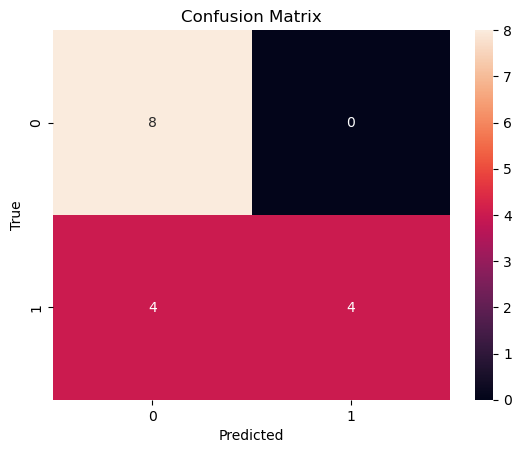

In [21]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

# Post-hoc analysis

In [57]:
#getting the indexes of the rows which were and weren't predicted correctly

control = a[a['Actual value'] == a['Predicted value']]
control = control[control['Actual value'] == 1]
print(control.index)
test = a[a['Actual value'] != a['Predicted value']]
print(test.index)

Int64Index([27, 34, 19, 79], dtype='int64')
Int64Index([77, 51, 14, 50], dtype='int64')


### Histogram

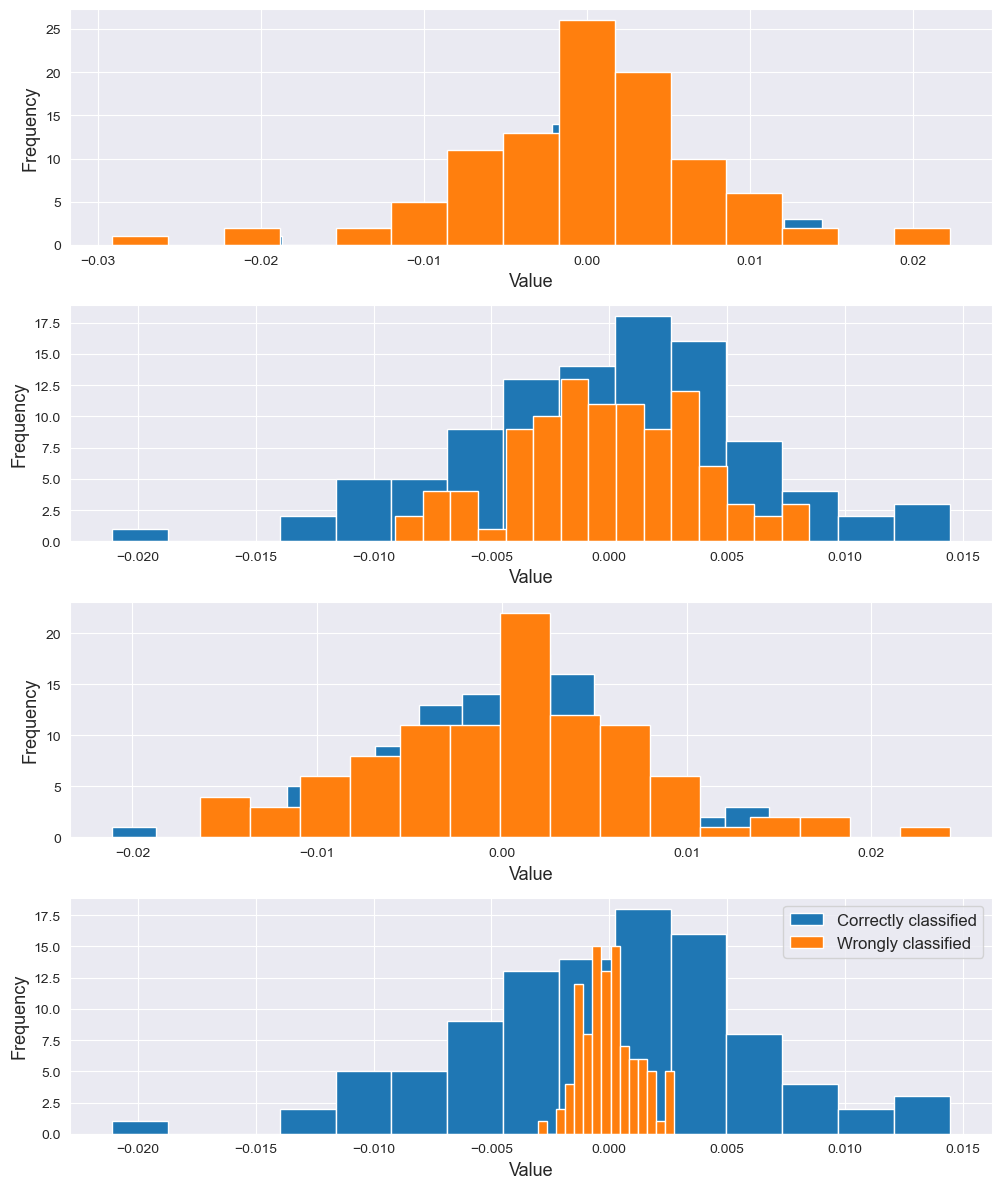

In [65]:
# histograms to compare between correctly and wrongly predicted audio data

sns.set_style('darkgrid') 

f, axes = plt.subplots(len(test.index), 1, figsize=(10, 12))
for i in range(len(test.index)):
    axes[i].hist(x.iloc[43], bins=15, label='Correctly classified')
    axes[i].hist(x.iloc[test.index[i]], bins=15, label='Wrongly classified')
    axes[i].set_xlabel("Value", size=13)
    axes[i].set_ylabel("Frequency", size=13) 

plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.show()

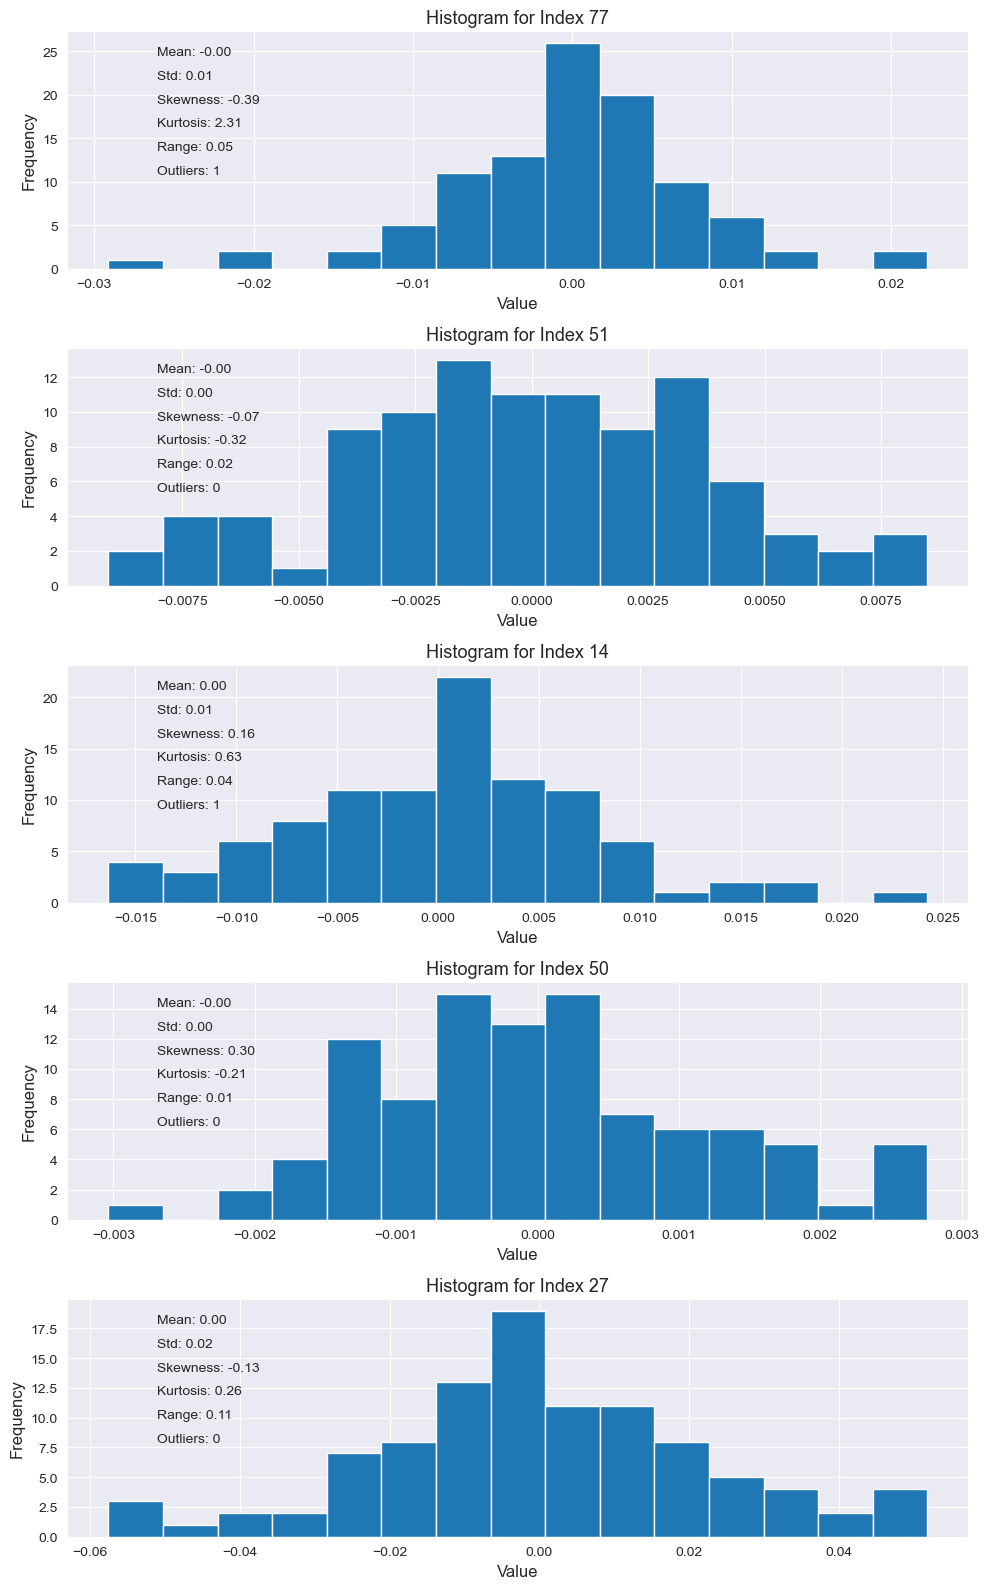

In [182]:
#histogram stats for each file being analysed

lst = test.index.append(control.index)
lst = lst[:len(test.index) + 1]

def get_hist_stats(lst):
    f, axes = plt.subplots(len(lst), 1, figsize=(10, 16))
    for i in range(len(lst)):
        data = x.iloc[lst[i]]
        mean = np.mean(data)
        std = np.std(data)
        skewness = skew(data)
        kurt = kurtosis(data)
        data_range = np.max(data) - np.min(data)
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        num_outliers = len(outliers)
        
        axes[i].hist(data, bins=15)
        axes[i].set_xlabel("Value", size=12)
        axes[i].set_ylabel("Frequency", size=12) 
        axes[i].set_title(f'Histogram for Index {lst[i]}', size=13)
        
        axes[i].text(0.1, 0.9, f'Mean: {mean:.2f}', transform=axes[i].transAxes)
        axes[i].text(0.1, 0.8, f'Std: {std:.2f}', transform=axes[i].transAxes)
        axes[i].text(0.1, 0.7, f'Skewness: {skewness:.2f}', transform=axes[i].transAxes)
        axes[i].text(0.1, 0.6, f'Kurtosis: {kurt:.2f}', transform=axes[i].transAxes)
        axes[i].text(0.1, 0.5, f'Range: {data_range:.2f}', transform=axes[i].transAxes)
        axes[i].text(0.1, 0.4, f'Outliers: {num_outliers}', transform=axes[i].transAxes)

    plt.tight_layout()
    plt.show()

get_hist_stats(lst)

### Boxplot

Median: 5.1886802898242626e-05
Q1: -0.003739129929315476
Q3: 0.00376744692017432
Number of outliers: 5

Median: -8.629346921060091e-05
Q1: -0.002494566348674887
Q3: 0.002694615647365717
Number of outliers: 0

Median: 0.000689081377993906
Q1: -0.004912544648393211
Q3: 0.0046639301879606
Number of outliers: 1

Median: -0.0001543594325751134
Q1: -0.0007824333346619899
Q3: 0.0007353040907118056
Number of outliers: 0



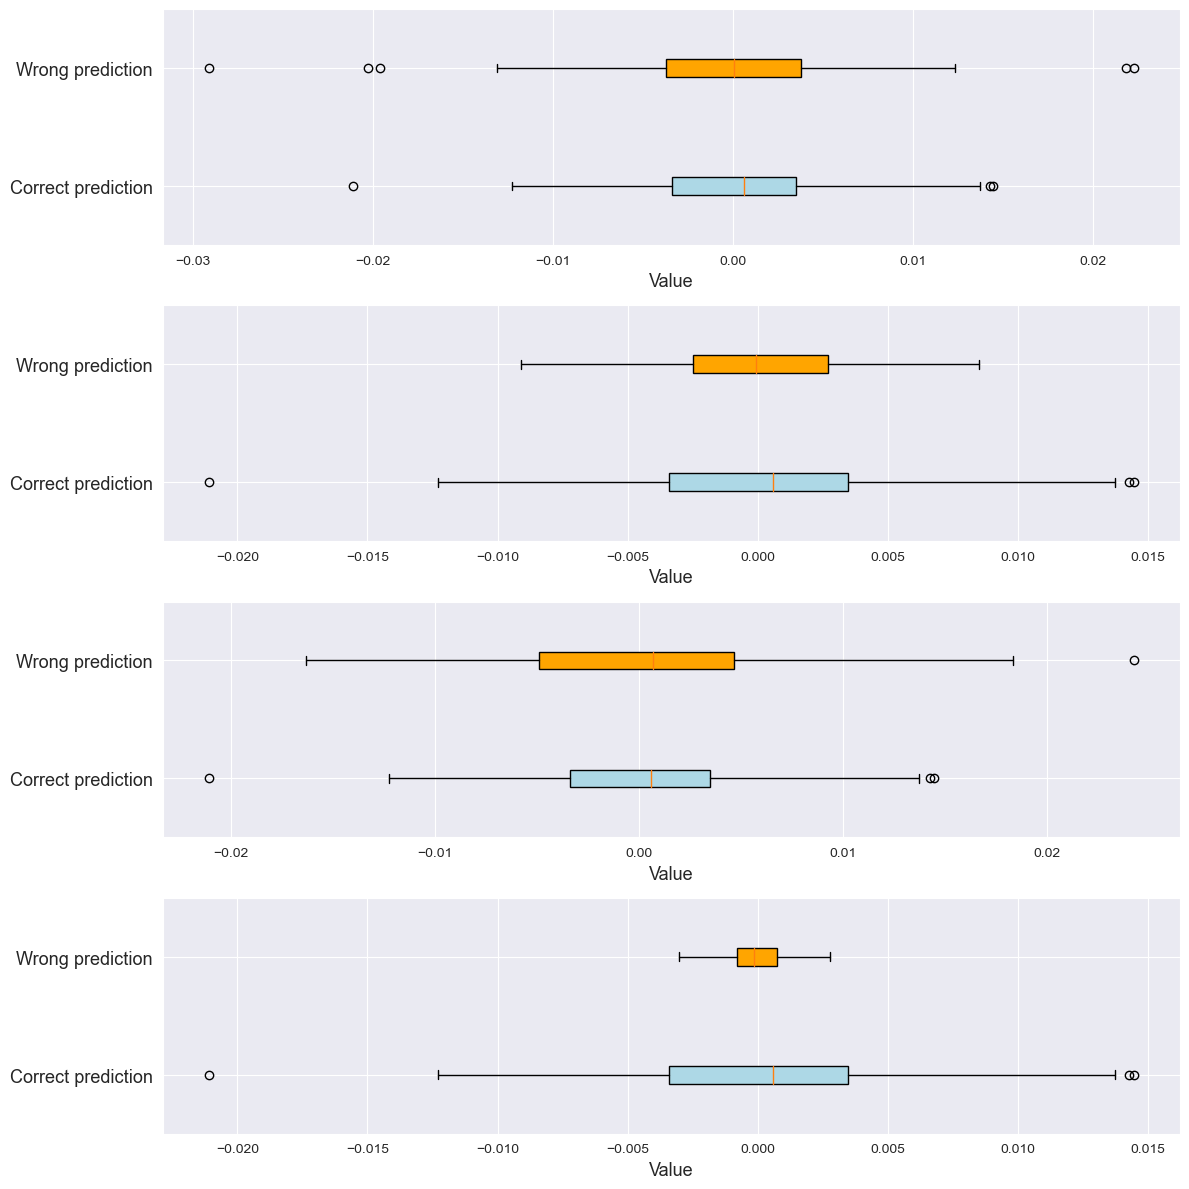

In [66]:
# boxplots to compare between correctly and wrongly predicted audio data

f, axes = plt.subplots(len(test.index), 1, figsize=(12, 12))

for i in range(len(test.index)):
    row1 = x.iloc[43]
    row2 = x.iloc[test.index[i]]
    data = [row1, row2]
    palette = ["lightblue", "orange"]
    plot = axes[i].boxplot(data,vert=False, patch_artist=True)
    for box, colour in zip(plot['boxes'], palette):
        box.set_facecolor(colour)
    axes[i].set_yticks([1, 2], ['Correct prediction', 'Wrong prediction'], size=13)
    axes[i].set_xlabel('Value', size=13)
    axes[i].xaxis.grid(True)
    
    median = np.median(row2)
    Q1 = np.percentile(row2, 25)
    Q3 = np.percentile(row2, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = row2[(row2 < lower_bound) | (row2 > upper_bound)]
    num_outliers = len(outliers)
    print("Median:", median)
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("Number of outliers:", num_outliers)
    print()
    
plt.tight_layout()
plt.show()


### Scatterplot

Pearson Correlation Coefficient: -0.0022731921304055096
p-value: 0.9820920669244307

Pearson Correlation Coefficient: -0.013594481139293933
p-value: 0.8932113448457231

Pearson Correlation Coefficient: -0.008841680185089205
p-value: 0.9304275867965281

Pearson Correlation Coefficient: -0.03229887250394248
p-value: 0.7497180162525839



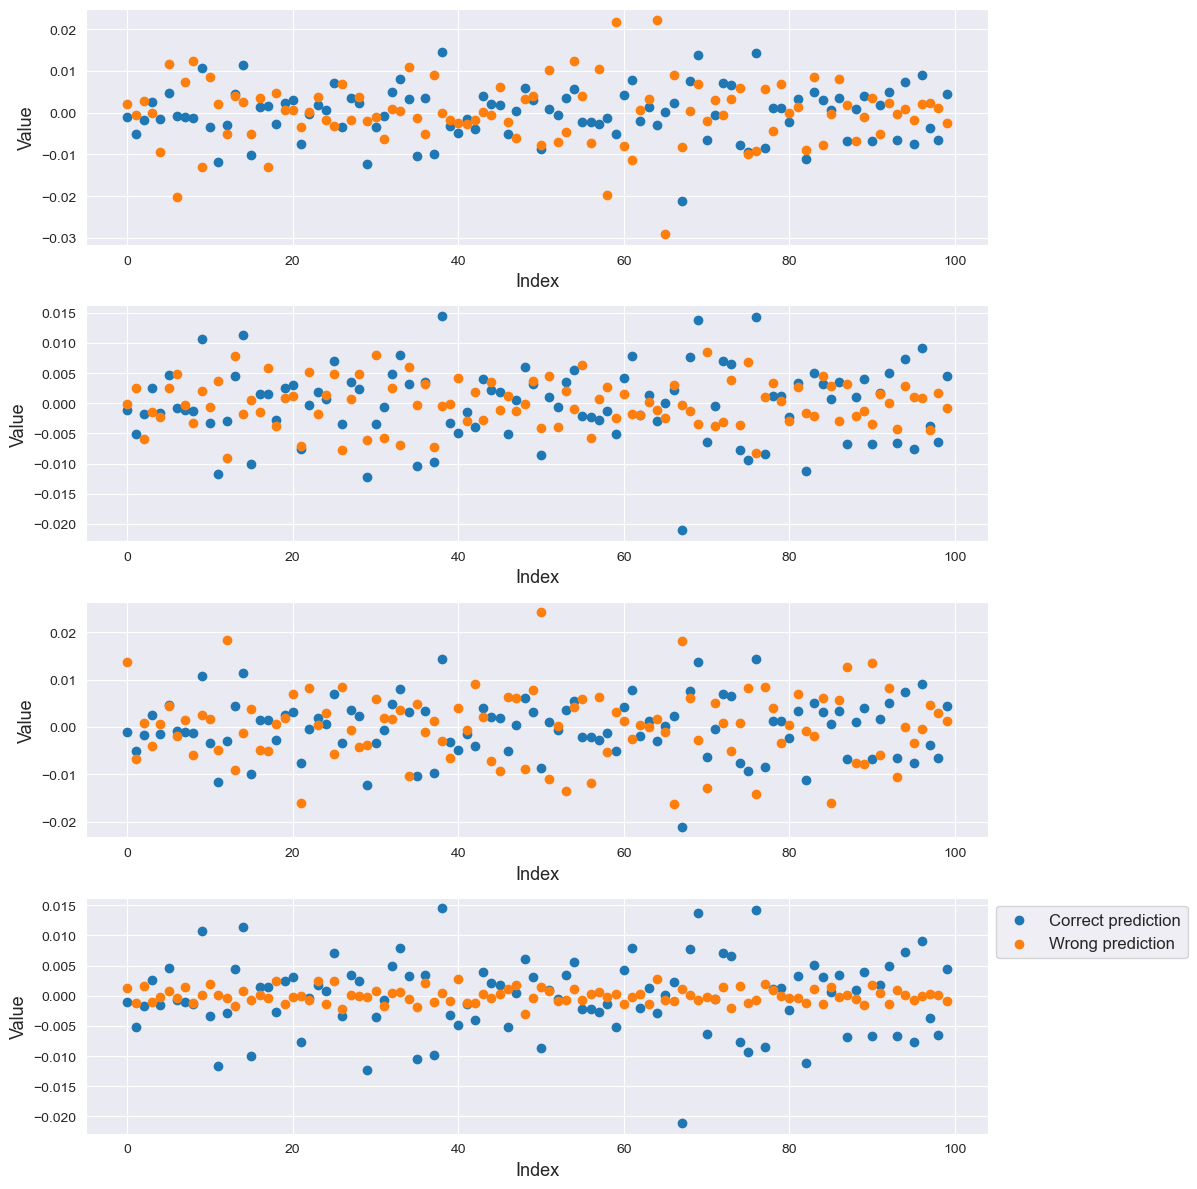

In [67]:
# scatterplots to compare between correctly and wrongly predicted audio data

f, axes = plt.subplots(len(test.index), 1, figsize=(12, 12))

for j in range(len(test.index)):
    row1 = x.iloc[43]
    row2 = x.iloc[test.index[j]]
    axes[j].scatter(range(len(row1)), row1, label='Correct prediction')
    axes[j].scatter(range(len(row2)), row2, label='Wrong prediction')
    axes[j].set_xlabel('Index', size=13)
    axes[j].set_ylabel('Value', size=13)
    corr, p_value = pearsonr(row2, range(len(row2)))
    print("Pearson Correlation Coefficient:", corr)
    print("p-value:", p_value)
    print()
    
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.tight_layout()
plt.show()

## Conclusion


The graphs from the post-hoc analysis show that the range of data was much smaller for the audio files which were classified wrongly as compared to the audio files which were classified correctly. This shows that the wrongly classified data had very different distributions from the normal, and thus the model was unable to categorize the data correctly.